# Теория вероятностей
## Практическое задание


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `N.ipynb` и `N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2 - 20 баллов
* Задача 3 - 10 баллов
* Задача 4 - 10 баллов

Весь код в авторском решении задания выполняется за полминуты.

In [122]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

**Задача 1.** В этой задаче вам нужно исследовать свойства плотности.

Для перечисленных ниже распределений нужно
1). На основе графиков плотности для различных параметров пояснить, за что отвечает каждый параметр.
2). Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.

Распределения:
* Нормальное (для этого распределения ниже дается большая часть кода, решение также было разобрано на презентации)
* Равномерное
* Экспоненциальное
* Гамма-распределение
* Бета-распределение

Функция, рисующая график плотности с заданными параметрами

In [123]:
def show_pdf(pdf, xmin, xmax, ymax, grid_size=100, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    pdf -- плотность
    xmin, xmax -- границы графика по оси x
    ymax -- граница графика по оси y
    grid_size -- размер сетки, по которой рисуется график
    kwargs -- параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)
    
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=3)
    plt.grid(ls=':')
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    plt.axis([xmin, xmax, 0, ymax])
    plt.show()

## Нормальное распределение

$
\begin{align}  
\rho(x, a, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - a)^2}{2\sigma^2}}
\end{align}
$  
  
В skipy $\mathcal{N}(a, \sigma^2)$ - это $norm$($loc=a$, $scale=\sigma$)

In [124]:
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.norm.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));

display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))

display(ip.children[-1])

ip.update()

Output()

Виджет в pdf передать не получится, поэтому нарисуйте еще несколько плотностей на одном графике, как это сделано ниже для нормального распределения.

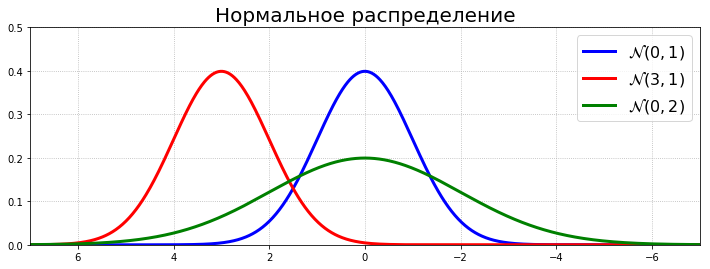

In [125]:
grid = np.linspace(-7, 7, num=1000)  # сетка для построения графика
a_list = [0, 3, 0]  # набор значений параметра a
sigma_list = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 4))
for i, (a, sigma, color) in enumerate(zip(a_list, sigma_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), color=color, lw=3, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))
plt.legend(fontsize=16)
plt.title("Нормальное распределение", fontdict={'fontsize': 20})
plt.grid(ls=':')
plt.axis([7, -7, 0, 0.5])
plt.show()

**Вывод:**
для нормального распределения $\mathcal{N}$($a$, $\sigma$):
* параметр $a$ отвечает за положение точки максимума функции плотности вероятности;
* параметр $\sigma$ отвечает за "крутизну пика" функции плотности вероятности, т. е. за то, какая доля остальных значений расположена достаточно близко к максимуму (чем меньше $\sigma$, тем круче пик и больше эта доля).

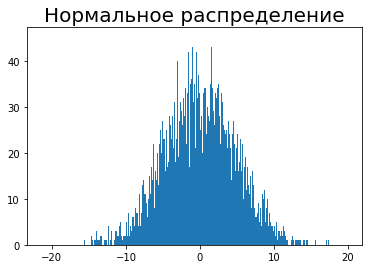

In [129]:
N = 10000
X = sps.norm.rvs(loc=0, scale=5, size = N)
H = plt.hist(X, bins = N // 10)
P = plt.title("Нормальное распределение", fontdict={'fontsize': 20})

**Вывод:**
полученная гистограмма неплохо приближает график плотности.

## Равномерное распределение

$
\begin{align}  
\rho(x, a, b) = \frac{1}{b - a}I(x \in [a, b])
\end{align}
$  
  
В skipy $\mathscr{U}(a, b)$ - это $uniform$($loc=a$, $scale=b - a$)

In [130]:
ip = widgets.interact(show_pdf,
                         pdf=widgets.fixed(sps.uniform.pdf),
                         grid_size=widgets.IntSlider(min=25, max=1000, step=25, value=800),
                         xmin=widgets.fixed(0),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=10),
                         ymax=widgets.FloatSlider(min=0, max=10, step=0.1, value=10),
                         loc=widgets.FloatSlider(min=0, max=5, step=1, value=0),
                         scale=widgets.FloatSlider(min=1, max=10, step=1, value=1));

interactive(children=(FloatSlider(value=10.0, description='xmax', max=10.0), FloatSlider(value=10.0, descripti…

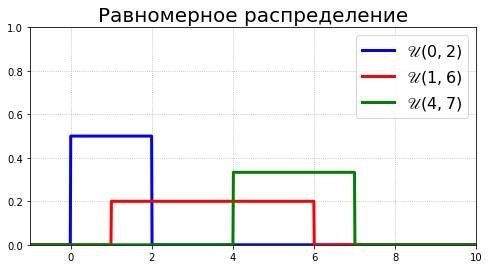

In [131]:
grid = np.linspace(-1, 10, num=1000)  # сетка для построения графика
a_list = [0, 1, 4]  # набор значений параметра a
a_b_list = [2, 5, 3]  # набор значений параметра sigma

plt.figure(figsize=(8, 4))
for i, (a, a_b, color) in enumerate(zip(a_list, a_b_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.uniform(a, a_b).pdf(grid), color=color, lw=3, 
             label='$\mathscr{U}' + '({}, {})$'.format(a, a + a_b))
plt.legend(fontsize=16)
plt.title("Равномерное распределение", fontdict={'fontsize': 20})
plt.grid(ls=':')
plt.axis([-1, 10, 0, 1])
plt.show()

**Вывод:**
для равномерного распределения $\mathscr{U}$(a, b):
* параметры a и b отвечают за начало и конец отрезка с ненулевой плотностью, 
а их совокупность(обратная разность) - за значение функции плотности на этом отрезке

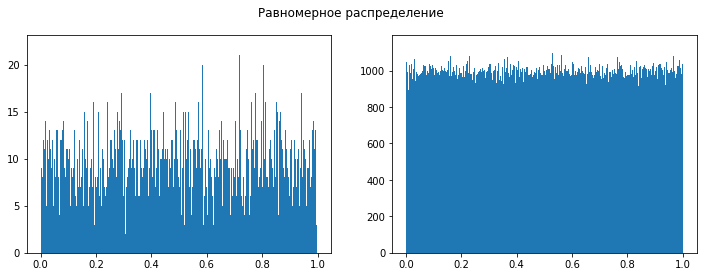

In [132]:
plt.figure(figsize=(12, 4))
plt.suptitle("Равномерное распределение", fontdict={'fontsize': 40})
plt.subplot(1, 2, 1)
N = 10000
X = sps.uniform.rvs(loc=0, scale=1, size = N)
H = plt.hist(X, bins = N // 10)
plt.subplot(1, 2, 2)
N = 10000000
X = sps.uniform.rvs(loc=0, scale=1, size = N)
H = plt.hist(X, bins = N // 1000)

**Вывод**: здесь гистограмма также близка к графику плотности, что особенно хорошо видно при достаточно большой выборке.

# Экспоненциальное распределение

$
\begin{align}  
\rho(x, \lambda) = \lambda e^{-\lambda x}I(x \ge 0)
\end{align}
$  
  
В skipy $Exp(\lambda)$ - это $expon$($scale=\frac{1}{\lambda}$, $loc=0$)

In [133]:
ip = widgets.interact(show_pdf,
                         pdf=widgets.fixed(sps.expon.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.fixed(0),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                         scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1));

interactive(children=(FloatSlider(value=5.0, description='xmax', max=10.0), FloatSlider(value=1.0, description…

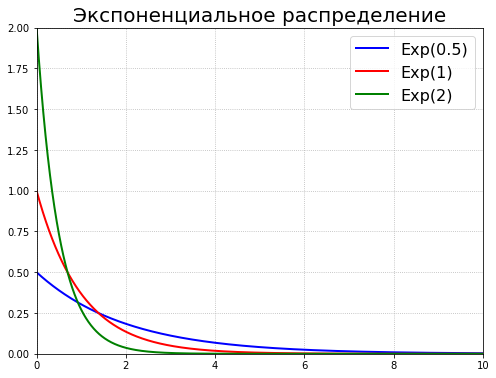

In [134]:
grid = np.linspace(0, 10, num=1000)
lambda_list = [0.5, 1, 2]

plt.figure(figsize=(8, 6))
for i, (ld, color) in enumerate(zip(lambda_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.expon(scale=1/ld).pdf(grid), color=color, lw=2, 
             label='Exp' + '({})'.format(ld))
plt.legend(fontsize=16)
plt.title("Экспоненциальное распределение", fontdict={'fontsize': 20})
plt.grid(ls=':')
plt.axis([0, 10, 0, 2])
plt.show()

**Вывод:**
для экспоненциального распределения Exp($\lambda$):
* параметр $\lambda$ отвечает за величину функции плотности в нуле и за скорость убывания функции.

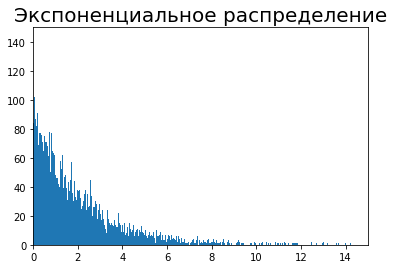

In [135]:
N = 10000
X = sps.expon.rvs(scale=2, size = N)
plt.axis([0, 15, 0, 150])
H = plt.hist(X, bins = N // 10)
P = plt.title("Экспоненциальное распределение", fontdict={'fontsize': 20})

**Вывод:**
и снова полученная гистограмма приближает график плотности.

# Гамма-распределение

$
\begin{align}
\rho(x, \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha - 1}e^{-\beta x}}{\Gamma(\alpha, \beta)} 
\end{align}
$  
  
В skipy $\Gamma(\alpha, \beta)$ - это $gamma$($a$, $scale=\frac{1}{\beta}$, $loc=0$)

In [136]:
ip = widgets.interact(show_pdf,
                         pdf=widgets.fixed(sps.gamma.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.fixed(0),
                         xmax=widgets.FloatSlider(min=0, max=10, step=1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=10, step=1, value=1),
                         a=widgets.FloatSlider(min=1, max=50, step=0.1, value=1),
                         loc=widgets.fixed(0),
                         scale=widgets.FloatSlider(min=0.1, max=4, step=0.1, value=1));

interactive(children=(FloatSlider(value=5.0, description='xmax', max=10.0, step=1.0), FloatSlider(value=1.0, d…

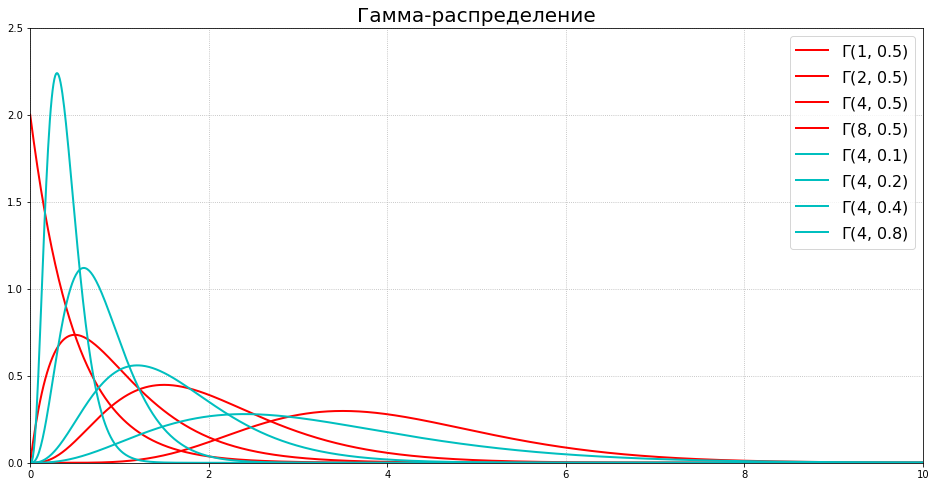

In [137]:
grid = np.linspace(0, 10, num=1000)
a_list = [1, 2, 4, 8, 4, 4, 4, 4]
scale_list = [0.5, 0.5, 0.5, 0.5, 0.1, 0.2, 0.4, 0.8]

plt.figure(figsize=(16, 8))
for i, (a, s, color) in enumerate(zip(a_list, scale_list, ['r', 'r', 'r', 'r', 'c', 'c', 'c', 'c'])):
    plt.plot(grid, sps.gamma(scale=s, a=a, loc=0).pdf(grid), color=color, lw=2, 
             label='$\Gamma$' + '({}, {})'.format(a, s))
plt.legend(fontsize=16)
plt.title("Гамма-распределение", fontdict={'fontsize': 20})
plt.grid(ls=':')
plt.axis([0, 10, 0, 2.5])
plt.show()

**Вывод**: в гамма-распределении $\Gamma$(k, $\theta$) оба параметра отвечают и за "крутизну пика", и за положение точки максимума, но k - в большей степени за положение точки максимума по оси X, 
а $\theta$ - в большей степери за "крутизну пика".

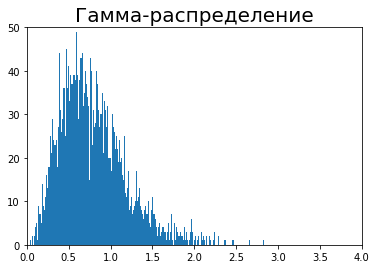

In [138]:
N = 10000
X = sps.gamma.rvs(scale=0.2, a=4, size = N)
plt.axis([0, 4, 0, 50])
H = plt.hist(X, bins = N // 10)
P = plt.title("Гамма-распределение", fontdict={'fontsize': 20})

**Вывод**: выбираем случайную величину ~ $\Gamma$(4, 0.2), и видим, что гистограмма хорошо приближает 
график функции плотности с такими же параметрами.

## Бета-распределение

$
\begin{align}
\rho(x, \alpha, \beta) = \frac{1}{B(\alpha, \beta)}x^{\alpha - 1}(1 - x)^{\beta - 1} 
\end{align}
$  
  
В skipy $B(\alpha, \beta)$ - это $beta$($a$, $b$, $loc=0$, $scale=1$)

In [139]:
ip = widgets.interact(show_pdf,
                         pdf=widgets.fixed(sps.beta.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.fixed(0),
                         xmax=widgets.fixed(1),
                         ymax=widgets.FloatSlider(min=0, max=50, step=1, value=1),
                         a=widgets.FloatSlider(min=0.1, max=50, step=0.1, value=1),
                         b=widgets.FloatSlider(min=0.1, max=50, step=0.1, value=1),
                         loc=widgets.fixed(0),
                         scale=widgets.fixed(1));

interactive(children=(FloatSlider(value=1.0, description='ymax', max=50.0, step=1.0), IntSlider(value=100, des…

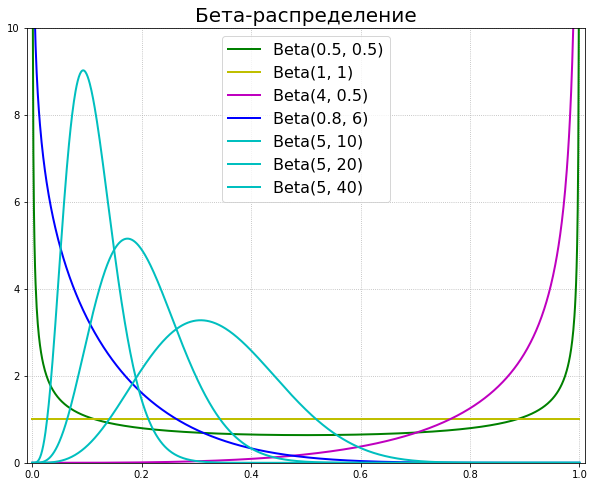

In [141]:
grid = np.linspace(0, 1, num=1000)
a_list = [0.5, 1, 4, 0.8, 5, 5, 5]
b_list = [0.5, 1, 0.5, 6, 10, 20, 40]

plt.figure(figsize=(10, 8))
for i, (a, b, color) in enumerate(zip(a_list, b_list, ['g', 'y', 'm', 'b', 'c', 'c', 'c'])):
    plt.plot(grid, sps.beta(b=b, a=a, loc=0, scale=1).pdf(grid), color=color, lw=2, 
             label='Beta' + '({}, {})'.format(a, b))
plt.legend(fontsize=16)
plt.title("Бета-распределение", fontdict={'fontsize': 20})
plt.grid(ls=':')
plt.axis([-0.01, 1.01, 0, 10])
plt.show()

**Вывод**: за все свойства плотности распределения отвечает совокупность параметров $\alpha$ и $\beta$, 
а не каждый из них по отдельности.  
Так, при $\alpha$ > 1 и $\beta$ > 1 функция имеет экстремум (максимум), и оба параметра отвечают за положение точки этого экстремума и величину значения плотности в этой точке. При увеличении $\alpha$ эта точка приближается к 1, а при уменьшении - к 0. Для $\beta$ - ноборот.  
При $\alpha$ < 1 и $\beta$ < 1  появляются асимптоты x = 0 и x = 1, график становится выпуклым.  
Если один из параметров <= 1, а другой >= 1 (но оба не равны 1), то функция постоянно убывает или возрастает.  
Частный случай: $\alpha$ и $\beta$ = 1. Распределение совпадает с равномерным на отрезке [0, 1].

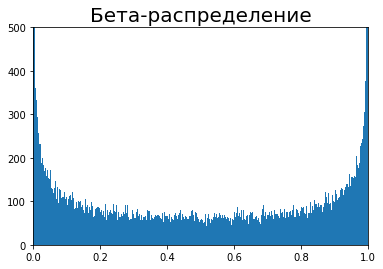

In [142]:
N = 1000000
X = sps.beta.rvs(scale=1, loc=0, a=0.5, b=0.5, size = N)
plt.axis([0, 1, 0, 500])
P = plt.title("Бета-распределение", fontdict={'fontsize': 20})
H = plt.hist(X, bins = N // 100)

**Вывод**: выбираем распределение с параметрами $\alpha$ = $\beta$ = 0.5 и убеждаемся, что полученная гистограмма 
снова похожа на график функции плотности. 

**Задача 2.** Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [143]:
coin = sps.bernoulli(0.5).rvs

In [144]:
def uniform(size=1, precision=30):
    return coin(np.append(size, precision)) @ 0.5 ** np.arange(1, precision + 1)

Проверим, что распределение получилось действительно равномерным.

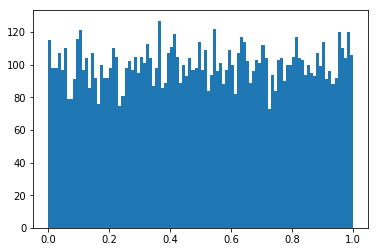

In [145]:
H = plt.hist(uniform(size=(10, 20, 50), precision=20).flatten(), bins = 100)

Для $U[0, 1]$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Сколько бросков монеты пришлось совершить?

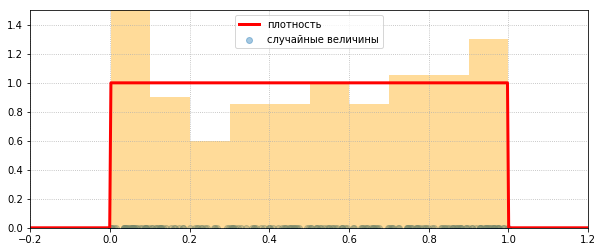

In [146]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size=size, precision=50)
plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size), alpha=0.4, label='случайные величины')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=10, normed=True, alpha=0.4, color='orange')
# рисуем график плотности
plt.plot(grid, 
         sps.uniform.pdf(grid), 
         color='red', lw=3, label='плотность')
plt.legend()
plt.grid(ls=':')
plt.xlim((-0.2, 1.2))
plt.ylim((0, 1.5))
plt.show()

**Сколько бросков монеты пришлось совершить?**  
200 значений с точностью 50 -> **10000 бросков** монеты

Исследуйте, как меняются значения случайных величин в зависимости от precision.

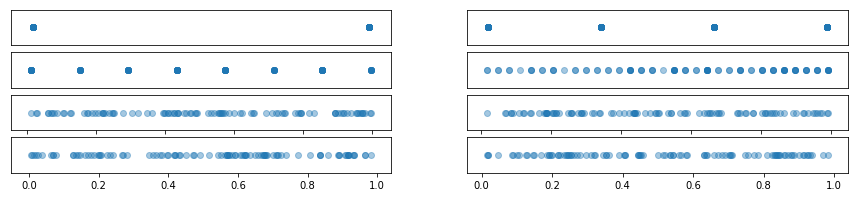

In [147]:
size = 100

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30, 50, 100]):
    plt.subplot(4, 2, i + 1)
    plt.scatter(uniform(size=size, precision=precision), 
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

Чем больше precision, тем больше количество различных значений, которое может принимать случайная величина. Поэтому её распределение становится всё ближе к равномерному на отрезке [0, 1]

*Часть 2.* Напишите функцию генерации случайных величин в количестве `size` штук (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

В преобразовании Бокса-Мюллера из двух независимых равномерно распределённых на (0, 1] случайных величин $\xi$ и $\eta$ можно получить две **независимые** случайные величины со стандартным нормальным распределением:  

$
\begin{align}
X = cos(2\pi\xi)\sqrt{-2ln(\eta)}
\end{align}
$  и    

$
\begin{align}
Y = sin(2\pi\xi)\sqrt{-2ln(\eta)}
\end{align}
$  

Воспользовавшись тем, что они независимы, можно сократить количество подбрасываний монеты: сгенерировать выборки из $\xi$ и $\eta$, в 2 раза меньше итоговых, получив, как следствие, в 2 раза меньшие выборки из нормально распределённых случайных величин $X$ и $Y$, и объединить их в итоговом ответе.  
Распределение $\mathcal{N}(loc, scale^2)$ получается из $Z$ $~$ $\mathcal{N}(0, 1)$ преобразованием loc + $scale * Z$

In [162]:
def normal(size=1, loc=0, scale=1, precision=30):
    first, second = np.array_split(uniform(size, precision), 2)
    second [second == 0.0] = 1
    return loc + scale * np.concatenate(
        [np.cos(2 * np.pi * first) * np.sqrt(-2 * np.log(second)),
         np.sin(2 * np.pi * first) * np.sqrt(-2 * np.log(second))])

Проверка:

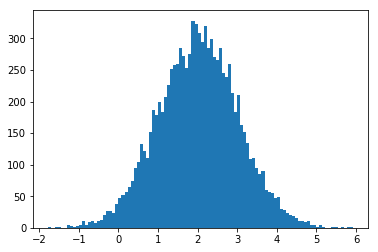

In [149]:
H = plt.hist(normal(size=(10, 20, 50), loc=2, precision=20).flatten(), bins = 100)

Для $\mathcal{N}(0, 1)$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам. Сколько бросков монеты пришлось совершить?

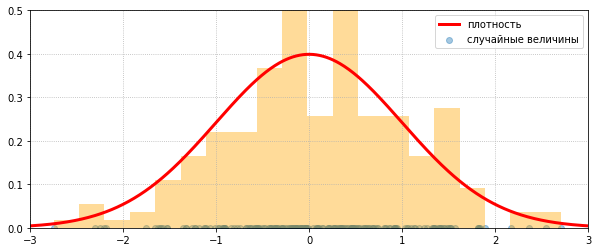

In [150]:
size = 200
grid = np.linspace(-3.0, 3.0, 500)
sample = normal(size=size, precision=50)
plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='случайные величины')
plt.hist(sample, bins=20, normed=True, alpha=0.4, color='orange')
plt.plot(grid, 
         sps.norm.pdf(grid), 
         color='red', lw=3, label='плотность')
plt.legend()
plt.grid(ls=':')
plt.xlim((-3, 3))
plt.ylim((0, 0.5))
plt.show()

**Сколько бросков монеты пришлось совершить?**  
Здесь мы снова взяли точность 50, при этом в преобразовании Бокса-Мюллера надо сгенерировать выборку для двух независимых случайных величин, но каждую - в 2 раза меньше, -> 2 $\cdot$ 50 $\cdot$ 200 / 2 = **10000 бросков** монеты

*Часть 3.* Теперь напишите функцию генерации выборки многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня от матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [151]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [152]:
def gauss(mean, cov_matrix, size=1, precision=30):
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    w, v = eigh(cov_matrix)
    B = v @ np.sqrt(np.diag(w))
    return (B @ normal((mean.shape[0], size))).T + mean

Сгенерируйте 200 случайных векторов из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите сгенерированные точки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

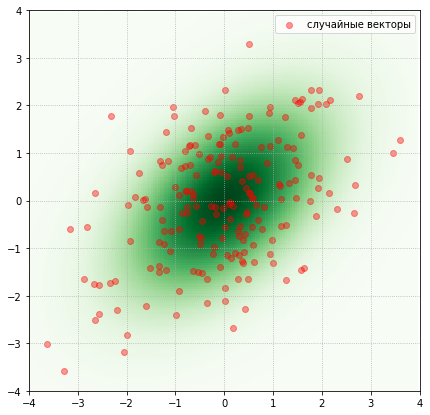

In [153]:
size = 200
x, y = np.mgrid[-4:4:0.05, -4:4:0.05]
grid = np.empty(np.append(x.shape, 2))
grid[:, :, 0] = x
grid[:, :, 1] = y
density = sps.multivariate_normal.pdf(mean=[0., 0.], cov=[[2., 1.], [1., 2.]], x=grid)
plt.figure(figsize=(7, 7))
plt.pcolormesh(x, y, density, cmap='Greens')
sample = gauss(mean=[0., 0.], cov_matrix=[[2., 1.], [1., 2.]], size=size)
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='случайные векторы', color='r')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**  
  
Цветовая диаграмма - это аналог гистограммы для двумерного распределения. По тому, как плотность точек, представляющих собой значения случайного вектора с многомерным нормальным распределением, согласуется с функцией плотности, можно убедиться в том, что выборка сгенерирована корректно.

Ясно, что mean отвечает за сдвиг. Можно посмотреть, как на диаграмме отражается изменение cov_matrix:

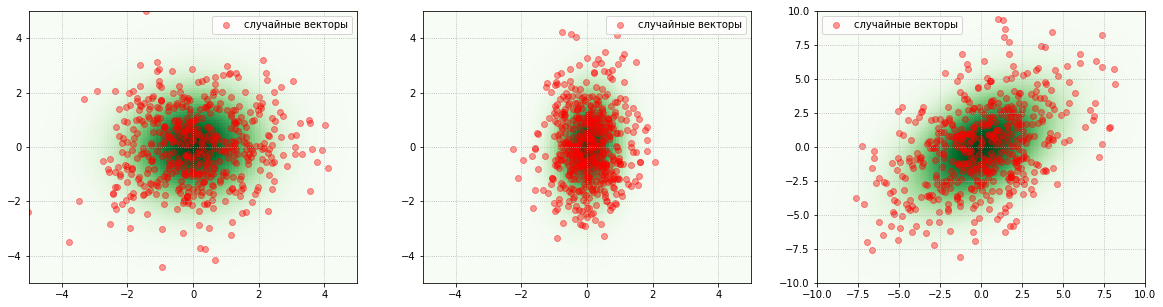

In [154]:
size = 500
x, y = np.mgrid[-10:10:0.1, -10:10:0.1]
grid = np.empty(x.shape + (2,))
grid[:, :, 0] = x
grid[:, :, 1] = y
plt.figure(figsize=(20, 5))
covs = [[[2., 0.1], [0.1, 2.]], [[0.5, 0.1], [0.1, 2]], [[9, 4], [4, 9]]]
limits = [(-5, 5), (-5, 5), (-10, 10)]
for idx in range(3):
    plt.subplot(1, 3, idx + 1)
    density = sps.multivariate_normal.pdf(mean=[0., 0.], cov=covs[idx], x=grid)
    plt.pcolormesh(x, y, density, cmap='Greens')
    sample = gauss(mean=[0., 0.], cov_matrix=covs[idx], size=size)
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='случайные векторы', color='r')
    plt.legend()
    plt.grid(ls=':')
    plt.xlim(limits[idx])
    plt.ylim(limits[idx])

Матрицы ковариаций $\begin{pmatrix}2 & 0.1 \\ 0, & 2\end{pmatrix}$, $\begin{pmatrix}0.5 & 0.1 \\ 0.1 & 2\end{pmatrix}$ и $\begin{pmatrix}9 & 4 \\ 4 & 9\end{pmatrix}$ соответственно

Видно, что ковариации на главной диагонали отвечают за "разброс" значений случайных векторов, т. е. размер той области на плосткости, где плотность выше всего. Что логично, т. к. ковариация случайной велчины с собой - это её дисперсия.  
Значения ковариации вне главной диагонали влияют на "наклон оси симметрии" области с максимальной плотностью: чем они меньше, тем меньше наклон.

**Еще одна часть задачи.** Вы уже научились генерировать случайные величины из равномерного распределения. Напишите функцию генерации случайных величин из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

$
\begin{align}
\rho(x) = \lambda e^{-\lambda x}    
\end{align}
$

$
\begin{align}
F(x) = 1 - e^{-\lambda x}  
\end{align}
$

Мы хотим получить случайную величину $\xi$ с распределением F. Известно, что случайная величина F($\xi$) имела бы равномерное распределение, так как функция F непрерывна. Поэтому получим случайную величину $\eta$ с равномерным распределением, и $F^{-1}$($\eta$) будет искомой.

$
\begin{align}
\xi = F^{-1}(\eta) = -\frac1\lambda ln(1 - \eta)  
\end{align}
$

In [155]:
def expon(size=1, lambd=1, precision=30):
    return -1/lambd * np.log(1 - uniform(size, precision))

Для $Exp(1)$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-0.5, 5]$, а также гистограмму по сгенерированным случайным величинам. 

### Экспоненциальное распределение с $\lambda$  = 1

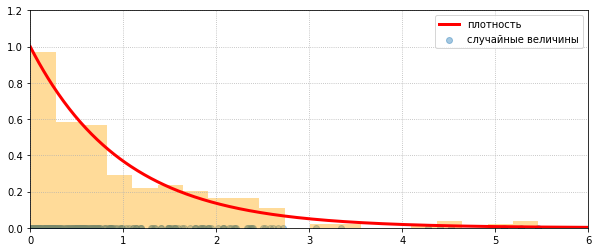

In [156]:
size = 200
grid = np.linspace(0.0, 6.0, 500)
sample = expon(size=size, precision=50)
plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='случайные величины')
plt.hist(sample, bins=20, normed=True, alpha=0.4, color='orange')
plt.plot(grid, 
         sps.expon.pdf(grid), 
         color='red', lw=3, label='плотность')
plt.legend()
plt.grid(ls=':')
plt.xlim((0, 6))
plt.ylim((0, 1.2))
plt.show()

**Вывод:**

То, что полученная гистограмма согласуется с графиком плотности, подтверждает, что выборка сгенерирована корректно.

В следующих задачах для генерации случайных величин можно использовать библиотеку `scipy.stats`.

**Задача 3.** В этой задаче нужно визуализировать *закон больших чисел*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $\mathcal{N}(a, \sigma^2)$. Согласно закону больших чисел выполнена сходимость $\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\to} a$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов среднее в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждому из них посчитайте среднее $X_{jn} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть среднее по первым $n$ величинам $j$-го набора. При написании кода может помочь функция `numpy.cumsum(axis=...)`.

Для каждого $j$ нанесите на один график зависимость $X_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Выполните те же действия для распределений $Exp(1)$ и $Pois(1)$.

Сделайте вывод о смысле закона больших чисел. Подтверждают ли сделанные эксперименты теоретические свойства?

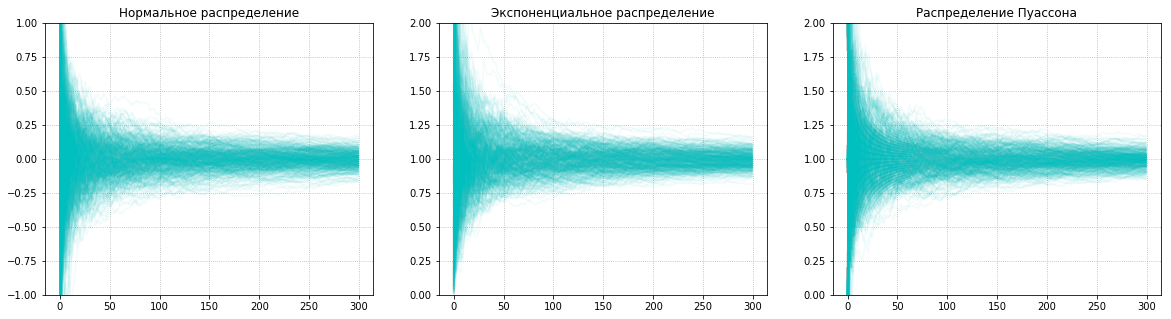

In [158]:
size = (500, 300)
plt.figure(figsize=(20, 5))
n_rng = np.arange(size[1]) + 1
titles = ["Нормальное распределение", "Экспоненциальное распределение", 
          "Распределение Пуассона"]
distr = [sps.norm, sps.expon, sps.poisson(mu=1)]
limits = [(-1, 1), (0, 2), (0, 2)]

for idx in range(3):
    rng = distr[idx].rvs(size=size)
    X_n = np.cumsum(rng, axis=1) / n_rng
    plt.subplot(1, 3, idx + 1)
    plt.plot(X_n.T, alpha=0.05, color='c')
    plt.title(titles[idx])
    plt.grid(ls=':')
    plt.ylim(limits[idx])

Эксперименты подтверждают теоретические свойства: так как в каждом из экспериментов случайные величины одинаково распределены, то последовательность их средних стремится к их (общему) матожиданию:  
для $\mathcal{N}(0, 1)$ это a = 0,  
для $Exp(1)$: $\frac1{\lambda}$ = 1,  
для $Pois(1)$: $\lambda$ = 1

Смысл закона больших чисел в том, что, не зная как распределены случайные величины, но имея в распоряжении 
достаточно большую их выборку, можно сделать выводы о свойствах их распределения, в частности, о матожидании 
(как в нашем примере). Кроме того, чем больше выборка, тем меньше результат зависит от конкретного эксперимента.

**Задача 4.** В этой задаче нужно визуализировать *центральную предельную теорему*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Пусть a и $\sigma^2$ - матожидание и дисперсия $\xi_i$, тогда $\mathsf{E}X_{jn}$ = na, $\mathsf{D}X_{jn}$ =$\sigma^2n$  
Тогда $Z_n = \frac{X_{jn} - na}{\sigma\sqrt{n}}$  
Матожидание и дисперсия данных распределений равны:  
$Exp(1)$: $\frac{1}{\lambda}$ = 1 и $\frac{1}{\lambda^2}$ = 1 соответственно  
$\mathcal{N}(0, 1)$: $\frac{a + b}{2}$ = 0.5 и $\frac{(b - a)^{2}}{12}$ = $\frac{1}{12}$  
$Pois(1)$: $\lambda$ = 1 и $\lambda^2$ = 1

In [165]:
size=(500, 300)
n_rng = np.arange(size[1]) + 1
titles = ["Экспоненциальное распределение", "Нормальное распределение", "Распределение Пуассона"]
distr = [sps.expon, sps.uniform, sps.poisson(mu=1)]
E = [1, 0.5, 1]
std = [1, np.sqrt(1/12), 1]
limits = [(0.8, 1.2), (0.4, 0.6), (0.8, 1.2)]

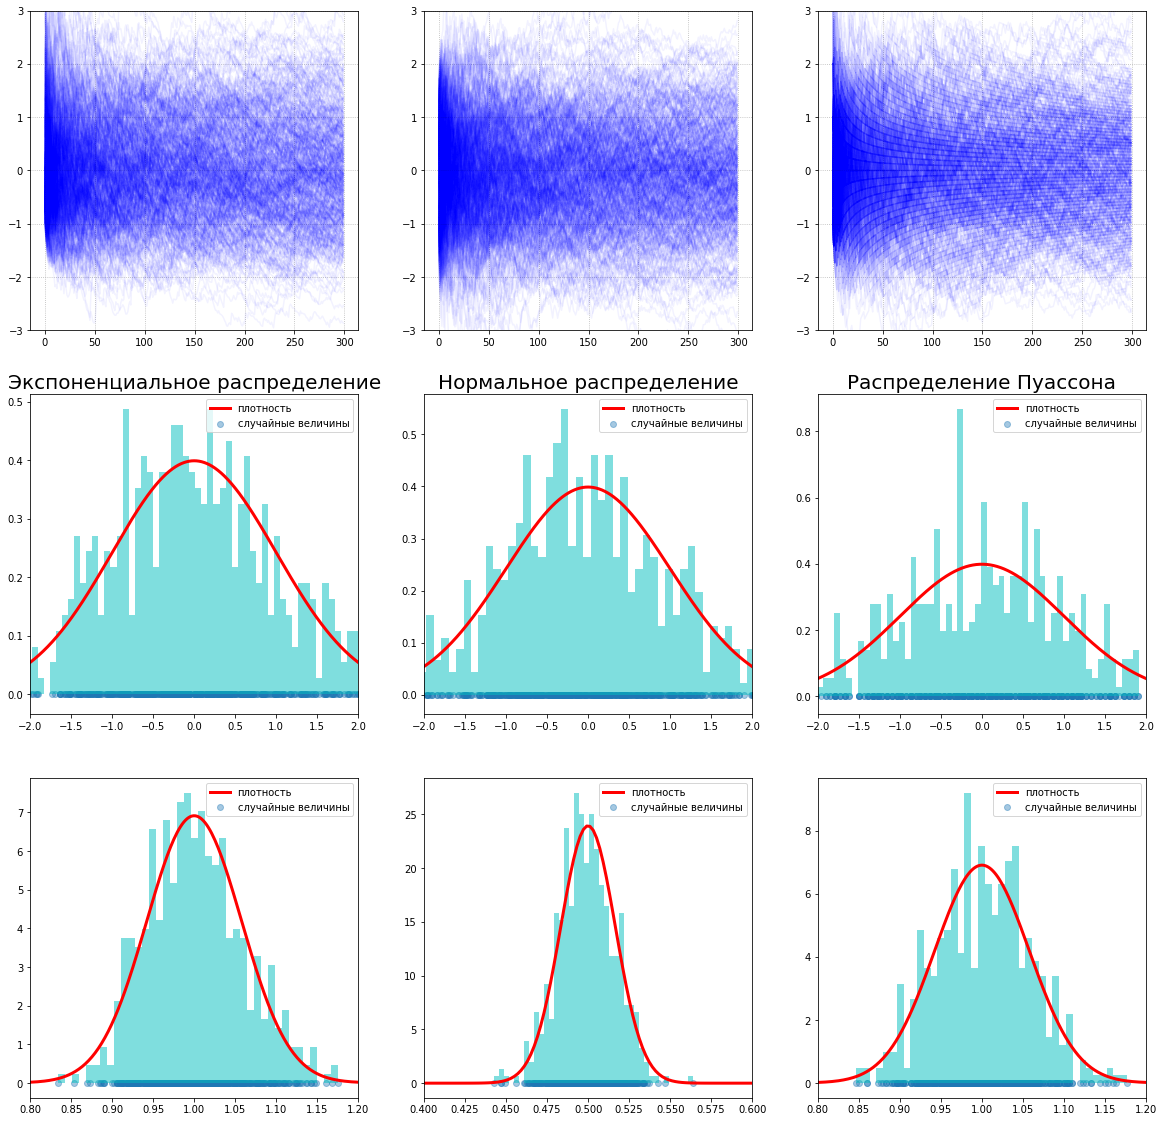

In [166]:
plt.figure(figsize=(20, 20))
for idx in range(3):
    sample = distr[idx].rvs(size=size)
    X_n = np.cumsum(sample, axis=1) / n_rng
    Z_n = (X_n - E[idx]) / std[idx] * np.sqrt(n_rng)
    plt.subplot(3, 3, idx + 1)
    plt.plot(Z_n.T, alpha=0.05, color='b')
    plt.grid(ls=':')
    plt.ylim((-3, 3))
    
    plt.subplot(3, 3, idx + 4)
    plt.scatter(x=Z_n[:, -1], y=np.zeros(size[0]), alpha=0.4, label='случайные величины')
    plt.hist(Z_n[:, -1], bins = 80, normed=True, alpha=0.5, color = 'c')
    grid = np.linspace(-3, 3, 3000)
    plt.plot(grid, sps.norm.pdf(grid), color='red', lw=3, label='плотность')
    plt.xlim((-2, 2))
    plt.title(titles[idx], fontdict={'fontsize': 20})
    plt.legend()
    
    plt.subplot(3, 3, idx + 7)
    plt.scatter(x=X_n[:, -1], y=np.zeros(size[0]), alpha=0.4, label='случайные величины')
    plt.hist(X_n[:, -1], bins = 40, normed=True, alpha=0.5, color = 'c')
    plt.plot(grid, sps.norm.pdf(loc=E[idx], x=grid,  scale=std[idx] / np.sqrt(300)),
             color='red', lw=3, label='плотность')
    plt.xlim(limits[idx])
    plt.legend()

Значения $Z_n$ не сходятся к какой-то одной константе, как и предполагалось, т. к. по утверждению теоремы при достаточно больших n эти суммы всего лишь стремятся к нормальному по распределению. Поэтому по отдельности последовательности $Z_n$ могут вести себя произвольно, главное, что для каждого конкретного k распределение совокупности всех $Z_k$ близко к нормальному. Это можно увидеть на гистограмме.

**Вывод:**  
Смысл Центральной предельной теоремы в том, что при увеличении выборки (из независимых одинаково распределённых случайных величин) распределение их суммы, если из неё вычесть среднее и нормировать, близко к стандартному нормальному распределению. Или, что то же самое, распределение суммы n значений таких случайных величин близко к распределению $\mathcal{N}(a, \frac{\sigma^2}{n})$. Это иллюстрируют и приведённые выше гистограммы, которые приближают графики плотности нормального распределения: верхние - для центрированной нормированной суммы, нижние - для обычной. То есть экспримент подтвердил теоретические свойства, известные из ЦПТ.